In [1]:
import matplotlib.pyplot as plt
import networkx as nx

from rwa_tools import (
    create_coupling_graph,
    split_into_independent_components,
    create_hamiltonian_symbolic,
    split_hamiltonian_by_components,
)

In [2]:
nstates = 7
couplings = [[(0, 2), (1, 2)], [(3, 5), (4, 5)]]
hamiltonian = create_hamiltonian_symbolic(couplings, nstates)
coupling_graph = create_coupling_graph(couplings, nstates=nstates)

In [3]:
hamiltonian.total

Matrix([
[                             E0,                               0, a0*Ω0*exp(I*t*ω0)/2,                               0,                               0,                   0,  0],
[                              0,                              E1, a1*Ω0*exp(I*t*ω0)/2,                               0,                               0,                   0,  0],
[a0*exp(-I*t*ω0)*conjugate(Ω0)/2, a1*exp(-I*t*ω0)*conjugate(Ω0)/2,                  E2,                               0,                               0,                   0,  0],
[                              0,                               0,                   0,                              E3,                               0, a2*Ω1*exp(I*t*ω1)/2,  0],
[                              0,                               0,                   0,                               0,                              E4, a3*Ω1*exp(I*t*ω1)/2,  0],
[                              0,                               0,                   0, a2*

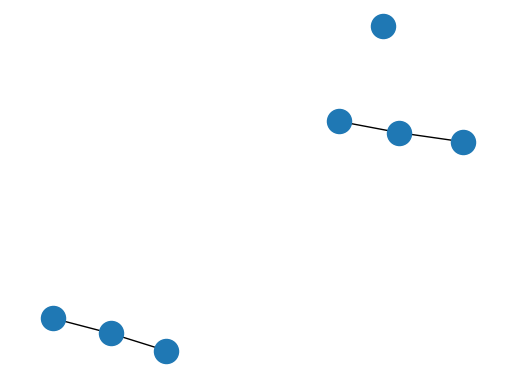

In [4]:
fig, ax = plt.subplots()
nx.draw(coupling_graph)

In [5]:
independent_graphs = split_into_independent_components(coupling_graph)

In [6]:
independent_hamiltonians = split_hamiltonian_by_components(
    hamiltonian, independent_graphs
)

In [7]:
independent_hamiltonians[0].total

Matrix([
[                             E0,                               0, a0*Ω0*exp(I*t*ω0)/2],
[                              0,                              E1, a1*Ω0*exp(I*t*ω0)/2],
[a0*exp(-I*t*ω0)*conjugate(Ω0)/2, a1*exp(-I*t*ω0)*conjugate(Ω0)/2,                  E2]])

In [8]:
independent_hamiltonians[1].total

Matrix([
[                             E3,                               0, a2*Ω1*exp(I*t*ω1)/2],
[                              0,                              E4, a3*Ω1*exp(I*t*ω1)/2],
[a2*exp(-I*t*ω1)*conjugate(Ω1)/2, a3*exp(-I*t*ω1)*conjugate(Ω1)/2,                  E5]])